# DreamerV3 with FSQ (Figure 19)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 19
plt.rcParams["legend.fontsize"] = 19

In [3]:
PALETTE = {
    "DC-MPC (ours)": "#984ea3",
    "DreamerV3 w/ one-hot": "#ff7f00",
    "DreamerV3 w/ FSQ": "#377eb8",
}
AGENTS = {
    "DCWM (ours)": "DC-MPC (ours)",
    "FSQ,d=32,c=[8, 4]": "DreamerV3 w/ FSQ",
    "One-hot,d=32,c=32": "DreamerV3 w/ one-hot",
}
YLABELS = {
    "episode_reward": "Episode Return",
}

main_envs = [
    "dog-run",
    "humanoid-walk",
    "reacher-hard",
    "walker-walk",
]

In [4]:
df = pd.read_csv("../data/ablations/dreamerv3-with-fsq.csv")

/var/folders/m7/4s90cb416f5gppt52n88ddn80000gp/T/ipykernel_41518/665927244.py:62: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


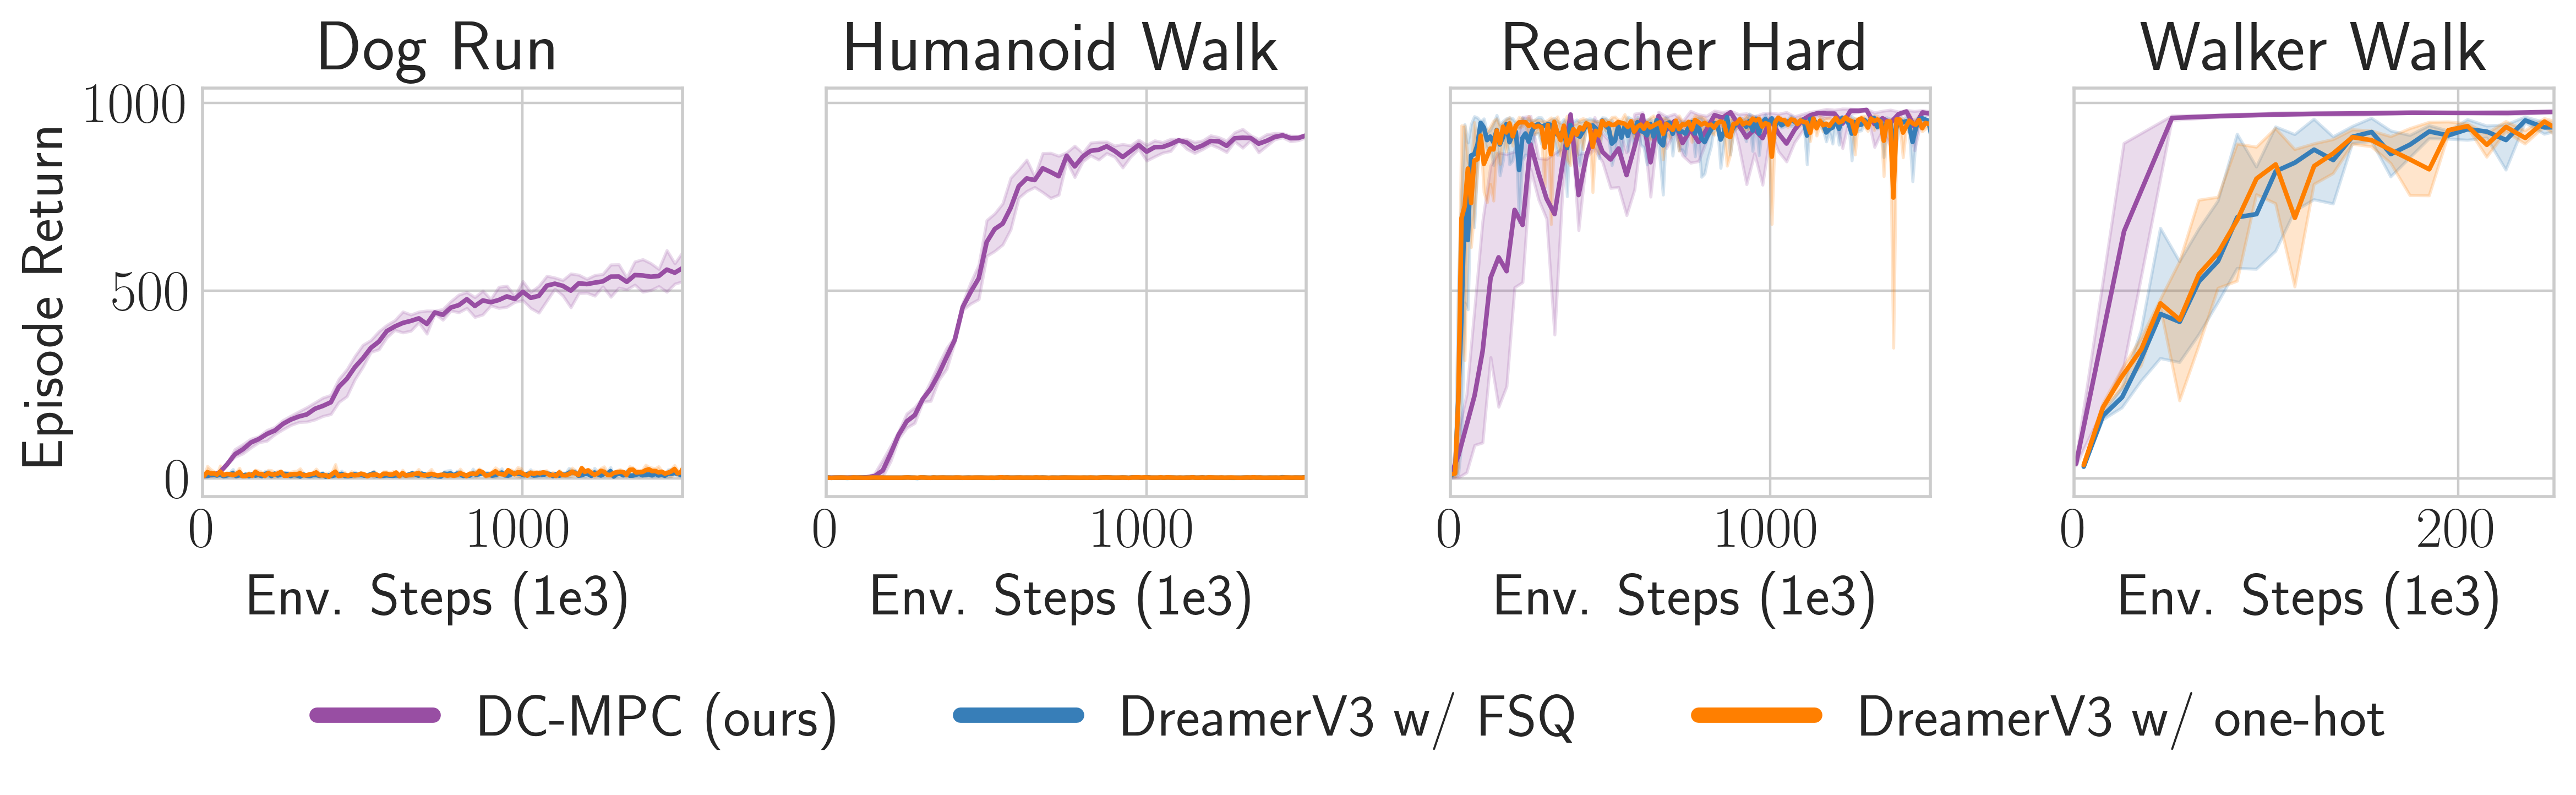

In [5]:
def plot(df):
    keys = ["episode_reward"]
    ncol = 4
    nrow = len(keys)
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(3 * ncol, 3.5 * nrow),
        sharex="col",
        sharey="row",
    )

    df.loc[:, "env_step"] = (df["env_step"] // 1000).astype(int)

    # Rename agents
    df.loc[:, "agent"] = df["agent"].replace(AGENTS)
    # df["agent"] = df["agent"].replace(AGENTS)


    for r, key in enumerate(keys):
        for idx, env in enumerate(main_envs):
            data = df[df["env"] == env]
            col = idx % ncol
            ax = axs[col]
            hue_order = AGENTS.values()
            legend = idx == len(main_envs) - 1

            g = sns.lineplot(
                x="env_step",
                y=key,
                data=data,
                errorbar=("ci", 95),
                hue="agent",
                hue_order=hue_order,
                palette=PALETTE,
                legend="auto" if legend else False,
                ax=ax,
            )

            if not r:
                ax.set_title(" ".join([ele.capitalize() for ele in env.split("-")]))
            if r == len(keys) - 1:
                ax.set_xlabel("Env. Steps (1e3)")
            else:
                ax.set_xlabel("")
            ax.set_ylabel("")
            if env in ["walker-walk"]:
                g.set(xlim=(0, 250))
            else:
                g.set(xlim=(0, 1500))
        axs[0].set_ylabel(YLABELS[key])

    l = axs[-1].legend(
        loc="upper center",
        bbox_to_anchor=(-1.5, -0.35),
        fancybox=False,
        shadow=False,
        ncol=len(df.agent.unique()),
    )
    for line in l.get_lines():
        line.set_linewidth(5.0)
    plt.tight_layout()
    fig.subplots_adjust(
        bottom=0.35,
        hspace=0.3,
        wspace=0.3,
        left=0.08,
        right=0.97,
        top=0.88,
    )

    plt.savefig(f"./figs/dreamer-fsq-ablation.pdf")

plot(df)